In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/fish-market/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Data not Cotain Dublivate Value

In [3]:
df.duplicated().value_counts()

False    159
dtype: int64

# Data Dont Have Missing Value

In [4]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
print(df.columns.to_list())

['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


In [6]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

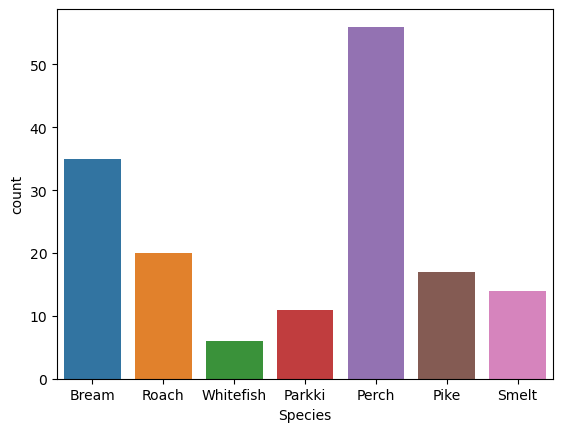

In [7]:
sns.countplot(x=df.Species)
plt.show()

<AxesSubplot:>

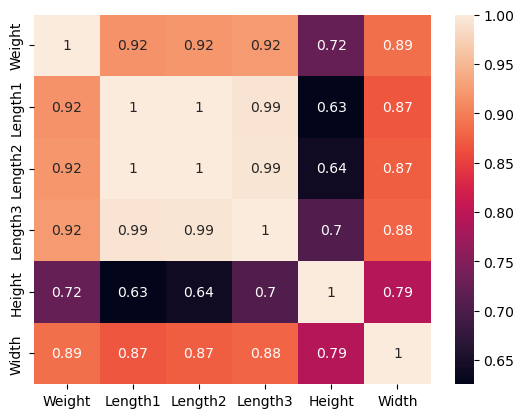

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df["Mean"] = df['Length1'] + df['Length2'] + df['Length3'] / 3
df.drop(columns=['Length1','Length2','Length3'],inplace=True)

In [10]:
df=df[['Species','Mean','Height','Width','Weight']]
df.head()

,Species,Mean,Height,Width,Weight
0,Bream,58.600000,11.5200,4.0200,242.0
1,Bream,60.700000,12.4800,4.3056,290.0
2,Bream,60.766667,12.3778,4.6961,340.0
3,Bream,66.466667,12.7300,4.4555,363.0
4,Bream,66.833333,12.4440,5.1340,430.0


<AxesSubplot:>

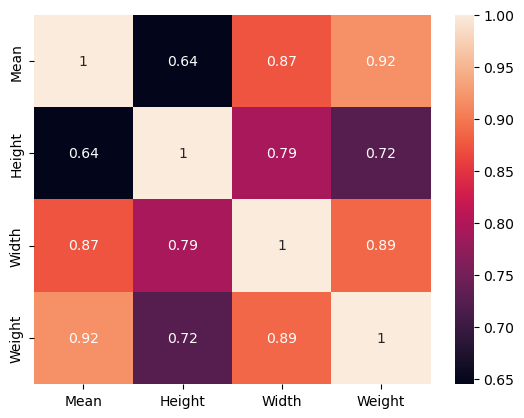

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
# We Are Getting Preticular Fish Mean of Weight, Length1, Length2, Length3, Height, Width

In [13]:
aa = df.groupby('Species')['Weight', 'Mean', 'Height', 'Width'].mean()
aa

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Weight,Mean,Height,Width
Species,,,,
Bream,617.828571,76.199048,15.183211,5.427614
Parkki,154.818182,46.669697,8.962427,3.220736
Perch,382.239286,63.485714,7.861870,4.745723
Pike,718.705882,104.198039,7.713771,5.086382
Roach,152.050000,51.243333,6.694795,3.657850
Smelt,11.178571,27.523810,2.209371,1.340093
Whitefish,531.000000,71.555556,10.027167,5.473050


In [14]:
df.describe()

,Mean,Height,Width,Weight
count,159.000000,159.000000,159.000000,159.000000
mean,65.071908,8.970994,4.417486,398.326415
std,24.558245,4.286208,1.685804,357.978317
min,18.833333,1.728400,1.047600,0.000000
25%,47.550000,5.944800,3.385650,120.000000
50%,62.200000,7.786000,4.248500,273.000000
75%,81.583333,12.365900,5.584500,650.000000
max,145.066667,18.957000,8.142000,1650.000000


# Fish Name to Numberic

In [15]:
df['Species'].value_counts().keys()

Index(['Perch', 'Bream', 'Roach', 'Pike', 'Smelt', 'Parkki', 'Whitefish'], dtype='object')

In [16]:
df['Species'] = df['Species'].replace({'Perch':0, 'Bream':1, 'Roach':2, 'Pike':3, 'Smelt':4, 'Parkki':5, 'Whitefish':6})

In [17]:
df.sample(3)

,Species,Mean,Height,Width,Weight
11,1,71.766667,14.3714,4.8146,500.0
62,5,35.600000,6.5772,2.3142,60.0
94,0,52.166667,5.2185,3.6260,150.0


# Data Spliting

In [18]:
x = df.drop(columns=['Species','Weight'],axis=1)
y = df['Weight']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((127, 3), (127,), (32, 3), (32,))

# liner Reg

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [23]:
liner = LinearRegression()
model = liner.fit(x_train,y_train)
model

LinearRegression()

# Linear Reg Testing

In [24]:
y_pred = model.predict(x_test)
y_pred

array([  70.16217177, -173.90088974,  389.83461245,  318.21715396,
        192.30318558,  773.24430744, -224.57942293,  279.47463281,
        268.55363122, 1128.68618282,  619.98703877,  777.42589117,
        587.10617391,  148.95611112,  657.58408006,  783.54744712,
        928.65817781,  318.0135542 ,  238.00941739,  589.81643179,
       -185.89856618,  599.73125083,  501.7487081 ,  521.32101552,
        782.94592086,  884.57610034,  217.83304285,  327.56191332,
       -247.24371292, -191.74279379,  681.00767273,   29.9464914 ])

## R2_Score

In [25]:
r2_scr_te = r2_score(y_test,y_pred)
print('r2 score:',r2_scr_te)

r2 score: 0.875558137928268


# Desiton Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
dt = DecisionTreeRegressor(max_leaf_nodes=10)
model_dec = dt.fit(x_train,y_train)
model_dec

DecisionTreeRegressor(max_leaf_nodes=10)

# Decision Tree Testing 

In [28]:
y_pred_dec = model_dec.predict(x_test)
y_pred_dec

array([  48.44074074,   48.44074074,  356.        ,  275.66666667,
        143.39285714,  742.61538462,   48.44074074,  275.66666667,
        143.39285714, 1600.        ,  500.        ,  928.84615385,
        636.        ,   48.44074074,  742.61538462,  742.61538462,
        928.84615385,  275.66666667,  143.39285714,  636.        ,
         48.44074074,  472.44444444,  356.        ,  472.44444444,
        742.61538462,  928.84615385,  143.39285714,  275.66666667,
         48.44074074,   48.44074074,  356.        ,   48.44074074])

## R2_Score

In [29]:
r2_scr_dt_te = r2_score(y_test,y_pred_dec)
print('r2 score:',r2_scr_dt_te)

r2 score: 0.8980235275268711


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)
model_rf

RandomForestRegressor()

# Rendom Forest Testing

In [32]:
y_pred_rf = model_rf.predict(x_test)
y_pred_rf

array([  80.77      ,   11.195     ,  298.05      ,  278.02      ,
        140.24      ,  809.05      ,    8.035     ,  215.25      ,
        188.34      , 1543.74166667,  602.34      ,  915.55      ,
        573.02      ,  115.82      ,  705.17      ,  839.31      ,
       1013.65      ,  265.78      ,  173.3       ,  632.77      ,
         10.097     ,  522.87      ,  369.64      ,  467.52      ,
        839.31      , 1010.55      ,  153.8       ,  274.32      ,
          8.035     ,   10.114     ,  419.89      ,   77.715     ])

## R2_Score

In [33]:
r2_scr_rf_te = r2_score(y_test,y_pred_rf)
print('r2 score:',r2_scr_rf_te)

r2 score: 0.9523771488430419
